In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ast

df_ted_main = pd.read_csv("data/ted_main.csv")
df_ted_transcripts = df = pd.read_csv("data/transcripts.csv")

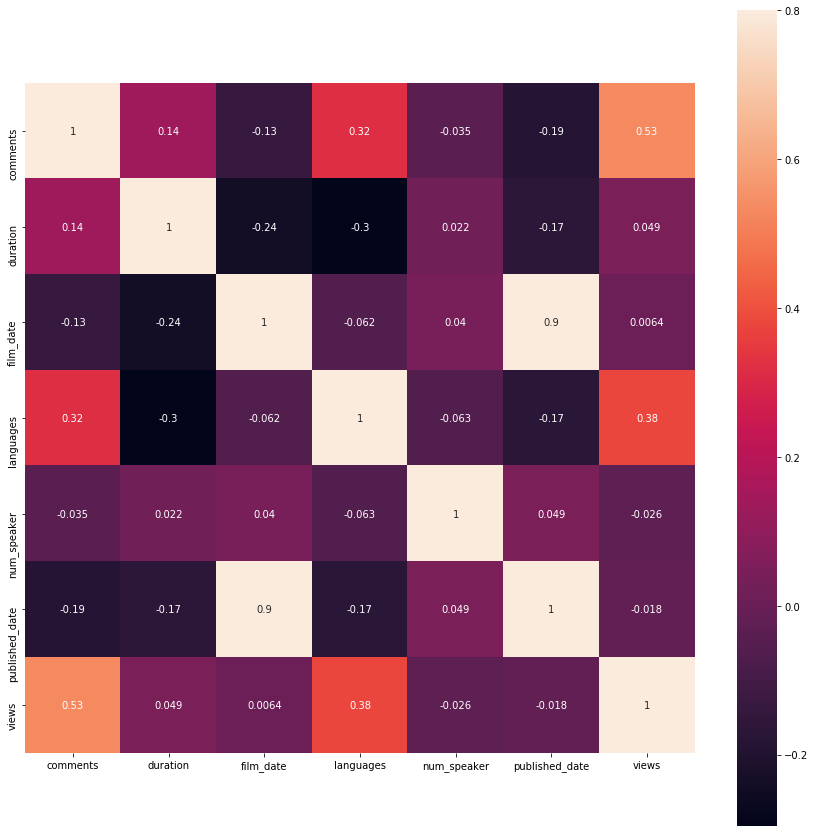

In [7]:
corr = df_ted_main.corr()

fig = plt.figure(figsize = (15,15))
sns.heatmap(corr, annot=True, vmax = .8, square = True)
plt.show()

In [8]:
######### ONE HOT ENCODING #########
# sort


# get only first 100
# df_ted_main = df_ted_main.head(100)

# iterate trough data set
for i, row in df_ted_main.iterrows():
    # change string formed list into normal list
    element_list_form = ast.literal_eval(df_ted_main.at[i,'tags'])
    element_list_form = [i.strip() for i in element_list_form]
    # finish converting by replacing string version of a list for the list type
    df_ted_main.at[i,'tags'] = element_list_form

# one hot encoding with column named "tags"
# since "tags" is a Series on each row, I need to split them first and then I can do one host encoding
one_hot_encoded_tags = df_ted_main.drop('tags', 1).join(
    pd.get_dummies(
        pd.DataFrame(df_ted_main.tags.tolist()).stack()
    ).astype(int).sum(level=0)
)

# dropping some columns to have an overview with one hot encoding only
one_hot_encoded_tags = one_hot_encoded_tags.drop(one_hot_encoded_tags.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]], axis=1)
one_hot_encoded_tags.head()

,3d printing,AI,AIDS,Addiction,Africa,Alzheimer's,Anthropocene,Asia,Autism spectrum disorder,Bioethics,...,wikipedia,wind energy,women,women in business,work,work-life balance,world cultures,writing,wunderkind,youth
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# list_with_counted_column_values = np.empty((0,3), int)
dic_with_counted_column_values = {}

for column in one_hot_encoded_tags:
    value_count = one_hot_encoded_tags[column].value_counts()
    # converting from series to int
    value_count = value_count[1].astype(int)
    dic_with_counted_column_values[column] = value_count
#     list_with_counted_column_values = np.append(list_with_counted_column_values, [[value_count]])
    
# np.sort(list_with_counted_column_values)
dic_with_counted_column_values = sorted(dic_with_counted_column_values.items(), key=lambda x: x[1], reverse=True)
print(dic_with_counted_column_values)



[('technology', 727), ('science', 567), ('global issues', 501), ('culture', 486), ('TEDx', 450), ('design', 418), ('business', 348), ('entertainment', 299), ('health', 236), ('innovation', 229), ('society', 224), ('art', 221), ('social change', 218), ('future', 195), ('communication', 191), ('biology', 189), ('creativity', 189), ('humanity', 182), ('collaboration', 174), ('environment', 165), ('economics', 164), ('medicine', 162), ('brain', 158), ('activism', 157), ('education', 153), ('community', 148), ('history', 146), ('TED Fellows', 143), ('children', 143), ('invention', 140), ('music', 140), ('health care', 132), ('politics', 128), ('cities', 123), ('psychology', 122), ('storytelling', 120), ('performance', 117), ('women', 117), ('nature', 116), ('identity', 113), ('war', 113), ('computers', 111), ('engineering', 111), ('life', 111), ('animals', 109), ('Africa', 105), ('humor', 105), ('exploration', 100), ('personal growth', 96), ('data', 94), ('inequality', 94), ('government', 9

In [10]:
df_ted_main = pd.read_csv("data/ted_main.csv")
sort = df_ted_main[['title', 'tags', 'comments']].sort_values('comments', ascending=False).head(100)

sort

,title,tags,comments
96,Militant atheism,"['God', 'atheism', 'culture', 'religion', 'sci...",6404
0,Do schools kill creativity?,"['children', 'creativity', 'culture', 'dance',...",4553
644,Science can answer moral questions,"['culture', 'evolutionary psychology', 'global...",3356
201,My stroke of insight,"['biology', 'brain', 'consciousness', 'global ...",2877
1787,How do you explain consciousness?,"['brain', 'consciousness', 'neuroscience', 'ph...",2673
954,Taking imagination seriously,"['art', 'cities', 'culture', 'data', 'design',...",2492
840,On reading the Koran,"['TEDx', 'culture', 'global issues', 'journali...",2374
1346,Your body language may shape who you are,"['body language', 'brain', 'business', 'psycho...",2290
661,The danger of science denial,"['global issues', 'medicine', 'religion', 'sci...",2272
677,How great leaders inspire action,"['TEDx', 'business', 'entrepreneur', 'leadersh...",1930


In [33]:
################# one hot encoding event column #####################
df = pd.read_csv("data/ted_main.csv")

# one hot encoding column event 
one_hot_event = pd.get_dummies(df['event'])
# Join the encoded df
df = df.join(one_hot_event)
# Remove unwanted column "event"
del df['event']
df.head()

,comments,description,duration,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,...,TEDxZurich,TEDxZurich 2011,TEDxZurich 2012,TEDxZurich 2013,Taste3 2008,The Do Lectures,Toronto Youth Corps,University of California,Web 2.0 Expo 2008,World Science Festival
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",...,0,0,0,0,0,0,0,0,0,0
1,265,With the same humor and humanity he exuded in ...,977,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",...,0,0,0,0,0,0,0,0,0,0
2,124,New York Times columnist David Pogue takes aim...,1286,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",...,0,0,0,0,0,0,0,0,0,0
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",...,0,0,0,0,0,0,0,0,0,0
4,593,You've never seen data presented like this. Wi...,1190,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",...,0,0,0,0,0,0,0,0,0,0
